In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
titanic_dataset = pd.read_csv("C:\\Users\\RAVI TEJA\\Documents\\Data Sets\\titanic.csv")

In [3]:
titanic_dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_dataset.shape

(1310, 14)

In [5]:
titanic_dataset.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [6]:
titanic_dataset.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
titanic_dataset.duplicated().any()

False

In [8]:
titanic_dataset.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [9]:
for i in titanic_dataset.columns:
    print(i)
    print(len(titanic_dataset[i].unique()),"        ",titanic_dataset[i].dtypes)

pclass
4          float64
survived
3          float64
name
1308          object
sex
3          object
age
99          float64
sibsp
8          float64
parch
9          float64
ticket
930          object
fare
282          float64
cabin
187          object
embarked
4          object
boat
28          object
body
122          float64
home.dest
370          object


In [10]:
titanic_dataset_1 = titanic_dataset.drop(["boat","body","home.dest"], axis = 1)

In [11]:
titanic_dataset_1.age.fillna(titanic_dataset_1.age.median(),inplace = True)

In [12]:
titanic_dataset_1.isna().sum()

pclass         1
survived       1
name           1
sex            1
age            0
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

In [13]:
titanic_dataset_1 = titanic_dataset_1.drop(["cabin"], axis = 1)

In [14]:
titanic_dataset_1["embarked"].fillna(titanic_dataset_1["embarked"].mode(),inplace = True)
titanic_dataset_1["fare"].fillna(titanic_dataset_1["fare"].mode(),inplace = True)
titanic_dataset_1.dropna(inplace = True)
titanic_dataset_1.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [15]:
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [16]:
titanic_dataset_1['FamilySize'] = titanic_dataset_1['sibsp'] + titanic_dataset_1['parch'] + 1
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0


In [17]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titanic_dataset_1['Title'] = titanic_dataset_1['name'].apply(get_title)
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0,Mrs


In [18]:
len(titanic_dataset_1['Title'].unique())

18

In [19]:
titanic_dataset_1['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [20]:
for title in titanic_dataset_1['Title'].unique():
    print(title, " ---- ",(((titanic_dataset_1['Title'] == title) == True).sum()))

Miss  ----  259
Master  ----  61
Mr  ----  756
Mrs  ----  196
Col  ----  4
Mme  ----  1
Dr  ----  8
Major  ----  2
Capt  ----  1
Lady  ----  1
Sir  ----  1
Mlle  ----  2
Dona  ----  1
Jonkheer  ----  1
Countess  ----  1
Don  ----  1
Rev  ----  8
Ms  ----  2


In [22]:
titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace('Mlle', 'Miss')
titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace('Ms', 'Miss')
titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace('Mme', 'Mrs')

In [23]:
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0,Mrs


<AxesSubplot:>

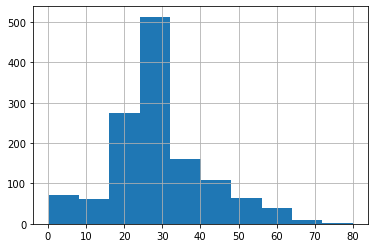

In [24]:
titanic_dataset_1['age'].hist()

In [26]:
titanic_dataset_1['Age_bin'] = pd.cut(titanic_dataset_1['age'], bins=[0,12,20,50,90], labels=['Children','Teenage','Adult','Elder'])

0.0 512.3292


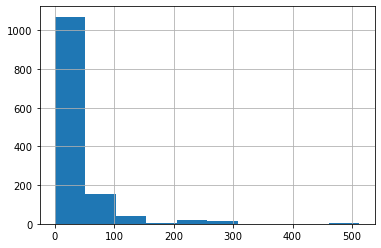

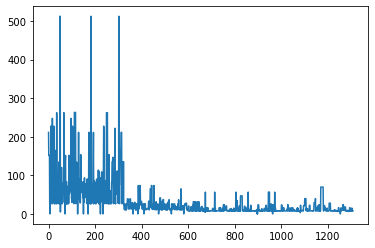

In [27]:
print(titanic_dataset_1["fare"].min(),titanic_dataset_1["fare"].max())
titanic_dataset_1['fare'].hist()
plt.show()
titanic_dataset_1['fare'].plot()
plt.show()

In [28]:
titanic_dataset_1['Fare_bin'] = pd.cut(titanic_dataset_1['fare'], bins=[0,50,100,150,200,250,520], labels=['very_low_fare','low_fare',
                                                                                      'average_fare','above_average_fare','high_fare','very_high_fare'])

In [29]:
print(titanic_dataset_1.shape)
titanic_dataset_1.head()

(1306, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize,Title,Age_bin,Fare_bin
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0,Miss,Adult,high_fare
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0,Master,Children,above_average_fare
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0,Miss,Children,above_average_fare
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0,Mr,Adult,above_average_fare
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0,Mrs,Adult,above_average_fare


In [30]:
titanic_dataset_1.drop(['age','fare','name','ticket'], axis=1, inplace = True)

In [38]:
titanic_dataset_1.head()

,pclass,survived,sex,sibsp,parch,embarked,FamilySize,Title,Age_bin,Fare_bin
0,1.0,1.0,female,0.0,0.0,S,1.0,Miss,Adult,high_fare
1,1.0,1.0,male,1.0,2.0,S,4.0,Master,Children,above_average_fare
2,1.0,0.0,female,1.0,2.0,S,4.0,Miss,Children,above_average_fare
3,1.0,0.0,male,1.0,2.0,S,4.0,Mr,Adult,above_average_fare
4,1.0,0.0,female,1.0,2.0,S,4.0,Mrs,Adult,above_average_fare


In [32]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
titanic_dataset_2 = pd.DataFrame()
for i in titanic_dataset_1.columns:
    titanic_dataset_2[i] = le.fit_transform(titanic_dataset_1[i])

In [37]:
titanic_dataset_2.head()

,pclass,survived,sex,sibsp,parch,embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,1,0,0,0,2,0,1,0,2
1,0,1,1,1,2,2,3,0,1,0
2,0,0,0,1,2,2,3,1,1,0
3,0,0,1,1,2,2,3,2,0,0
4,0,0,0,1,2,2,3,3,0,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [45]:
X = titanic_dataset_2.drop("survived",axis = 1)
y = titanic_dataset_2["survived"]

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 1)

accuracy of train and test
train     0.8100102145045965


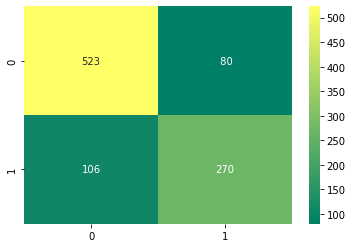

test     0.8256880733944955


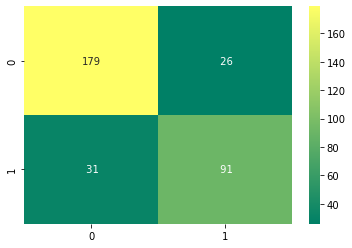

cross_val_score     0.806899766899767


In [54]:
svc = SVC()
svc.fit(x_train,y_train)
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

print("accuracy of train and test")
print("train", "   " ,accuracy_score(y_train,y_train_pred))
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot = True,fmt = "3.0f",cmap = "summer")
plt.show()

print("test", "   ", accuracy_score(y_test,y_test_pred))
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True,fmt = "3.0f",cmap = "summer")
plt.show()

print("cross_val_score" , "   " ,cross_val_score(svc,titanic_dataset_2.drop("survived",axis = 1),titanic_dataset_2["survived"],cv = 20).mean())